In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance

import numpy as np 
import sklearn
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from pathlib import Path
from utilities import opendata,modelado_regression_lineal
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
print(sns.__version__)

ruta = Path('datos\extracted_data.csv')
ruta2 = Path('datos\dataset.csv')
if ruta.exists():
    print("ruta valida")
else:
    print("ruta no valida")
    
print("¡Todas las librerías están instaladas correctamente!")
# Configurar pandas para mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)


0.13.2
ruta valida
¡Todas las librerías están instaladas correctamente!


<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\d'
C:\Users\estad\AppData\Local\Temp\ipykernel_17072\3373398567.py:22: SyntaxWarning: invalid escape sequence '\e'
  ruta = Path('datos\extracted_data.csv')
C:\Users\estad\AppData\Local\Temp\ipykernel_17072\3373398567.py:23: SyntaxWarning: invalid escape sequence '\d'
  ruta2 = Path('datos\dataset.csv')


In [2]:
dataset = opendata(ruta)[["value","capex"]]
dataset

,value,capex
0,373.00,434.00
1,400.00,927.56
2,1587.50,2675.50
3,650.00,1500.00
4,461.38,1137.08
5,501.08,723.51
6,256.93,385.06
7,144.85,196.90
8,52.64,90.80
9,58.90,81.90


<Axes: >

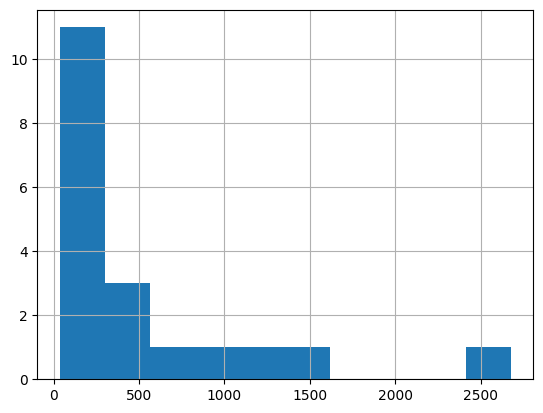

In [3]:
dataset['capex'].hist()

<Axes: >

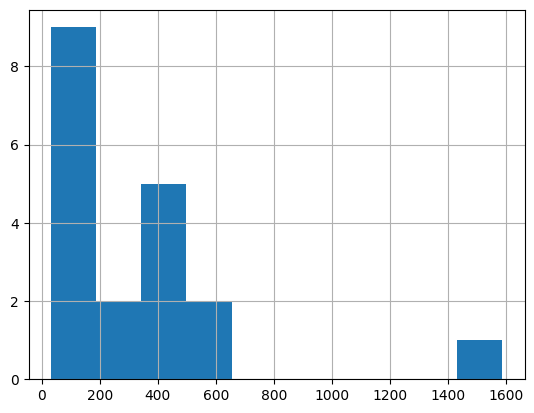

In [6]:
dataset['value'].hist()

In [5]:
dataset.corr()

,value,capex
value,1.00000,0.95621
capex,0.95621,1.00000


<Axes: xlabel='value', ylabel='capex'>

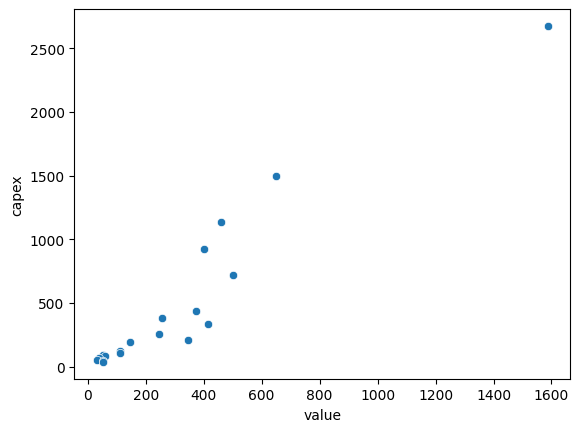

In [7]:
# Gráfico de dispersión
sns.scatterplot(data=dataset, x='value', y='capex')


In [8]:
data = dataset.copy()

In [10]:
Q1 = data['capex'].quantile(0.25)
Q3 = data['capex'].quantile(0.75)
IQR = Q3 - Q1
data['is_outlier'] = ((data['capex'] > Q3 + 1.5 * IQR) | (data['capex'] < Q1 - 1.5 * IQR)).astype(int)
data



,value,capex,is_outlier
0,373.00,434.00,0
1,400.00,927.56,0
2,1587.50,2675.50,1
3,650.00,1500.00,1
4,461.38,1137.08,0
5,501.08,723.51,0
6,256.93,385.06,0
7,144.85,196.90,0
8,52.64,90.80,0
9,58.90,81.90,0


In [9]:
modelado_regression_lineal(data,test_size=0.2)

Coeficientes del modelo: [1.7826754]
Intercepción del modelo: -20.67250280321798
MAE: 183.8057097644526


In [14]:

data = opendata(ruta)
data

,min_year_stage_date,value,capex,factor_capex/capacity,count
0,2002,373.00,434.00,1.16,1
1,2007,400.00,927.56,2.32,1
2,2008,1587.50,2675.50,1.69,4
3,2009,650.00,1500.00,2.31,1
4,2010,461.38,1137.08,2.46,8
5,2011,501.08,723.51,1.44,12
6,2012,256.93,385.06,1.50,14
7,2013,144.85,196.90,1.36,52
8,2014,52.64,90.80,1.73,72
9,2015,58.90,81.90,1.39,91


In [15]:


# Crear la variable 'is_outlier' basada en valores atípicos de capex
Q1 = data['capex'].quantile(0.25)
Q3 = data['capex'].quantile(0.75)
IQR = Q3 - Q1
data['is_outlier'] = ((data['capex'] > Q3 + 1.5 * IQR) | (data['capex'] < Q1 - 1.5 * IQR)).astype(int)

# Crear la variable dummy para los años 2014 a 2017
data['is_2014_2017'] = ((data['min_year_stage_date'] >= 2014) & (data['min_year_stage_date'] <= 2017)).astype(int)

# Definir las variables predictoras y objetivo
X_with_new_dummy = data[['value', 'is_outlier', 'is_2014_2017']]
y = data['capex']

# Dividir los datos en entrenamiento y validación (70% - 30%)
X_train_new_dummy, X_val_new_dummy, y_train, y_val = train_test_split(X_with_new_dummy, y, test_size=0.3, random_state=42)

# Crear un esquema de ponderación basado en 'is_outlier'
weights_new_model = np.where(data['is_outlier'] == 1, 0.3, 1)  # Peso reducido para valores atípicos
weights_new_model_train = weights_new_model[X_train_new_dummy.index]  # Ajustar pesos para el conjunto de entrenamiento

# Entrenar el modelo de Regresión Lineal ponderada con la dummy 'is_2014_2017'
model_with_weights_and_dummy = LinearRegression()
model_with_weights_and_dummy.fit(X_train_new_dummy, y_train, sample_weight=weights_new_model_train)

# Hacer predicciones en el conjunto de validación
y_pred_with_weights_and_dummy = model_with_weights_and_dummy.predict(X_val_new_dummy)

# Calcular el MAE
mae_with_weights_and_dummy = mean_absolute_error(y_val, y_pred_with_weights_and_dummy)

# Imprimir el MAE final
print("MAE del modelo ponderado con dummy:", mae_with_weights_and_dummy)


MAE del modelo ponderado con dummy: 81.97277090131008


### Modelo con multiples variables

In [22]:
dataset2 = opendata(ruta2)
dataset2.head()

,id,permalink,source,curationlevel,qualitytype,latitude,longitude,publicationdate,sectors,geographicareas,contentstatusflow,capacity_id,unit,value,estimatedcapacity,capacity_type,capex,capex_estimated,country,locations,valid_capacities,min_year_stage_date
0,313606909,xbemuoc0b-nuevo-parque-eolico-assurua-5-v-comp...,CMS,HUMAN,STANDARD,-10.819960,-42.741035,2021-10-09 12:02:00.000,{ELECTRIC_POWER},{BAHIA},PUBLISHED,497997771,MEGAWATT,34.8,False,electricpower-onshorewind,41.46,False,BRAZIL,"{{AMERICA,SOUTH_AMERICA,BRAZIL,NORTH_EAST_AREA...",1,2021.0
1,123285461,xg4zhzaqq-umburanas-25-wind-farm,OLD_BNA,HUMAN,STANDARD,-9.745833,-41.885000,2019-03-15 04:00:00.000,{ELECTRIC_POWER},"{BRAZIL,BAHIA,BAHIA}",PUBLISHED,596687660,MEGAWATT,18.0,False,electricpower-onshorewind,18.20,False,BRAZIL,"{{AMERICA,SOUTH_AMERICA,BRAZIL,NORTH_EAST_AREA...",1,2015.0
2,123893360,xhj5vw2dl-casa-nova-iii-wind-farm,OLD_BNA,HUMAN,STANDARD,-9.161944,-40.970833,2018-03-01 04:00:00.000,{ELECTRIC_POWER},"{BRAZIL,BAHIA,BAHIA}",PUBLISHED,596776381,MEGAWATT,28.0,False,electricpower-wind,29.00,False,BRAZIL,"{{AMERICA,SOUTH_AMERICA,BRAZIL,"""",""""},{AMERICA...",1,2016.0
3,123604664,x7qld5apc-ge-jangada-wind-park,OLD_BNA,HUMAN,STANDARD,-5.078596,-35.970720,2018-12-28 04:00:00.000,{ELECTRIC_POWER},"{BRAZIL,RIO_GRANDE_DO_NORTE,RIO_GRANDE_DO_NORTE}",PUBLISHED,595801980,MEGAWATT,30.0,False,electricpower-wind,36.10,False,BRAZIL,"{{AMERICA,SOUTH_AMERICA,BRAZIL,"""",""""},{AMERICA...",1,2014.0
4,123554604,xsp881ush-dreen-guajiru-wind-park,OLD_BNA,HUMAN,STANDARD,-5.147437,-35.860820,2018-12-28 04:00:00.000,{ELECTRIC_POWER},"{BRAZIL,RIO_GRANDE_DO_NORTE,RIO_GRANDE_DO_NORTE}",PUBLISHED,597392164,MEGAWATT,22.0,False,electricpower-wind,27.20,False,BRAZIL,"{{AMERICA,SOUTH_AMERICA,BRAZIL,"""",""""},{AMERICA...",1,2014.0


In [25]:
dataset2.capex_estimated.value_counts()
dataset2.country.value_counts()
dataset2.min_year_stage_date.value_counts()

min_year_stage_date
2015.0    91
2016.0    86
2014.0    72
2017.0    64
2022.0    59
2013.0    52
2020.0    38
2021.0    33
2023.0    24
2018.0    20
2019.0    17
2012.0    14
2011.0    12
2010.0     8
2024.0     7
2008.0     4
2007.0     1
2002.0     1
2009.0     1
Name: count, dtype: int64

In [26]:
dataset2.capacity_type.value_counts()

capacity_type
electricpower-wind             182
electricpower-onshorewind      158
photovoltaic                   129
electricpower-solar             77
electricpower-hydro             24
combinedcycle                   16
biomass                         12
hydrodam                         9
thermo-naturalgasgeneration      7
electricpower-minihydro          3
electricpower-offshorewind       3
thermo-coalgeneration            2
nuclear                          1
runoftheriver                    1
Name: count, dtype: int64

In [27]:
dataset2.sectors.value_counts()

sectors
{ELECTRIC_POWER}                607
{ELECTRIC_POWER,WATER_WASTE}      9
{WATER_WASTE,ELECTRIC_POWER}      4
{ELECTRIC_POWER,OILGAS}           4
Name: count, dtype: int64

In [28]:
dataset2.curationlevel.value_counts()

curationlevel
HUMAN      540
CURATED     80
SCRAPED      4
Name: count, dtype: int64

In [29]:
dataset2.qualitytype.value_counts()


qualitytype
STANDARD    589
BASIC        35
Name: count, dtype: int64

In [30]:
dataset2.source.value_counts()

source
OLD_BNA      422
CMS          118
CONNOTATE     84
Name: count, dtype: int64

### Seleccion de caracteristicas

In [75]:
dataset3 = dataset2[["curationlevel","source","capacity_type","latitude","longitude","value","capex"]]
dataset3

,curationlevel,source,capacity_type,latitude,longitude,value,capex
0,HUMAN,CMS,electricpower-onshorewind,-10.819960,-42.741035,34.8,41.460000
1,HUMAN,OLD_BNA,electricpower-onshorewind,-9.745833,-41.885000,18.0,18.200000
2,HUMAN,OLD_BNA,electricpower-wind,-9.161944,-40.970833,28.0,29.000000
3,HUMAN,OLD_BNA,electricpower-wind,-5.078596,-35.970720,30.0,36.100000
4,HUMAN,OLD_BNA,electricpower-wind,-5.147437,-35.860820,22.0,27.200000
...,...,...,...,...,...,...,...
619,CURATED,CONNOTATE,electricpower-onshorewind,-31.603646,-53.530245,25.3,0.000026
620,CURATED,CONNOTATE,photovoltaic,-9.468027,-40.498352,30.0,21.807466
621,SCRAPED,CONNOTATE,electricpower-hydro,-27.558983,-51.433394,24.0,13.662100
622,HUMAN,OLD_BNA,electricpower-hydro,-10.165424,-59.454597,261.0,600.000000


<Axes: xlabel='value', ylabel='capex'>

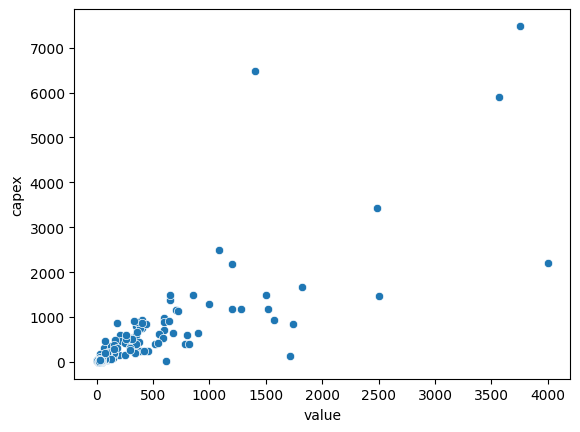

In [76]:
# Gráfico de dispersión
sns.scatterplot(data=dataset3, x='value', y='capex')

In [77]:
# Crear la variable 'is_outlier' basada en valores atípicos de capex
Q1 = dataset3['capex'].quantile(0.25)
Q3 = dataset3['capex'].quantile(0.75)
IQR = Q3 - Q1
dataset3['is_outlier'] = ((dataset3['capex'] > Q3 + 1.5 * IQR) | (dataset3['capex'] < Q1 - 1.5 * IQR)).astype(int)
dataset3.reset_index(drop=True, inplace=True)
dataset3 = pd.get_dummies(dataset3,columns=["capacity_type"])
dataset3 = pd.get_dummies(dataset3,columns=["source"])
dataset3 = pd.get_dummies(dataset3,columns=["curationlevel"])
dataset3

C:\Users\estad\AppData\Local\Temp\ipykernel_17072\2777704619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['is_outlier'] = ((dataset3['capex'] > Q3 + 1.5 * IQR) | (dataset3['capex'] < Q1 - 1.5 * IQR)).astype(int)


,latitude,longitude,value,capex,is_outlier,capacity_type_biomass,capacity_type_combinedcycle,capacity_type_electricpower-hydro,capacity_type_electricpower-minihydro,capacity_type_electricpower-offshorewind,capacity_type_electricpower-onshorewind,capacity_type_electricpower-solar,capacity_type_electricpower-wind,capacity_type_hydrodam,capacity_type_nuclear,capacity_type_photovoltaic,capacity_type_runoftheriver,capacity_type_thermo-coalgeneration,capacity_type_thermo-naturalgasgeneration,source_CMS,source_CONNOTATE,source_OLD_BNA,curationlevel_CURATED,curationlevel_HUMAN,curationlevel_SCRAPED
0,-10.819960,-42.741035,34.8,41.460000,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,-9.745833,-41.885000,18.0,18.200000,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,-9.161944,-40.970833,28.0,29.000000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
3,-5.078596,-35.970720,30.0,36.100000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
4,-5.147437,-35.860820,22.0,27.200000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,-31.603646,-53.530245,25.3,0.000026,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False
620,-9.468027,-40.498352,30.0,21.807466,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False
621,-27.558983,-51.433394,24.0,13.662100,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
622,-10.165424,-59.454597,261.0,600.000000,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [90]:
y = dataset3['capex']
X_with_new_dummy = dataset3.drop(["capex"], axis=1)


# Dividir los datos en entrenamiento y validación (70% - 30%)
X_train_new_dummy, X_val_new_dummy, y_train, y_val = train_test_split(X_with_new_dummy, y,
                                                                      test_size=0.2, random_state=2)

# Entrenar el modelo de Regresión Lineal ponderada con la dummy 'is_2014_2017'
model_with_weights_and_dummy = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=12)
model_with_weights_and_dummy.fit(X_train_new_dummy, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_with_weights_and_dummy = model_with_weights_and_dummy.predict(X_val_new_dummy)

# Calcular el MAE
mae_with_weights_and_dummy = mean_absolute_error(y_val, y_pred_with_weights_and_dummy)
mae_with_weights_and_dummy

53.98192517463508

In [91]:
y = dataset3['capex']
X_with_new_dummy = dataset3.drop(["capex"], axis=1)


# Dividir los datos en entrenamiento y validación (70% - 30%)
X_train_new_dummy, X_val_new_dummy, y_train, y_val = train_test_split(X_with_new_dummy, y,
                                                                      test_size=0.2, random_state=2)

# Entrenar el modelo de Regresión Lineal ponderada con la dummy 'is_2014_2017'
model_with_weights_and_dummy  = SVR(kernel='linear', C=1.0)

model_with_weights_and_dummy.fit(X_train_new_dummy, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_with_weights_and_dummy = model_with_weights_and_dummy.predict(X_val_new_dummy)

# Calcular el MAE
mae_with_weights_and_dummy = mean_absolute_error(y_val, y_pred_with_weights_and_dummy)
mae_with_weights_and_dummy

36.52564446957887

In [104]:
y = dataset3['capex']
X_with_new_dummy = dataset3.drop(["capex"], axis=1)


# Dividir los datos en entrenamiento y validación (70% - 30%)
X_train_new_dummy, X_val_new_dummy, y_train, y_val = train_test_split(X_with_new_dummy, y,
                                                                      test_size=0.2, random_state=2)

# Entrenar el modelo de Regresión Lineal ponderada con la dummy 'is_2014_2017'
model_with_weights_and_dummy = XGBRegressor(n_estimators=1000,
                                            learning_rate=0.1, 
                                            max_depth=4,
                                            random_state=42)

model_with_weights_and_dummy.fit(X_train_new_dummy, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_with_weights_and_dummy = model_with_weights_and_dummy.predict(X_val_new_dummy)

# Calcular el MAE
mae_with_weights_and_dummy = mean_absolute_error(y_val, y_pred_with_weights_and_dummy)
mae_with_weights_and_dummy

24.208642368241108

<Figure size 1000x600 with 0 Axes>

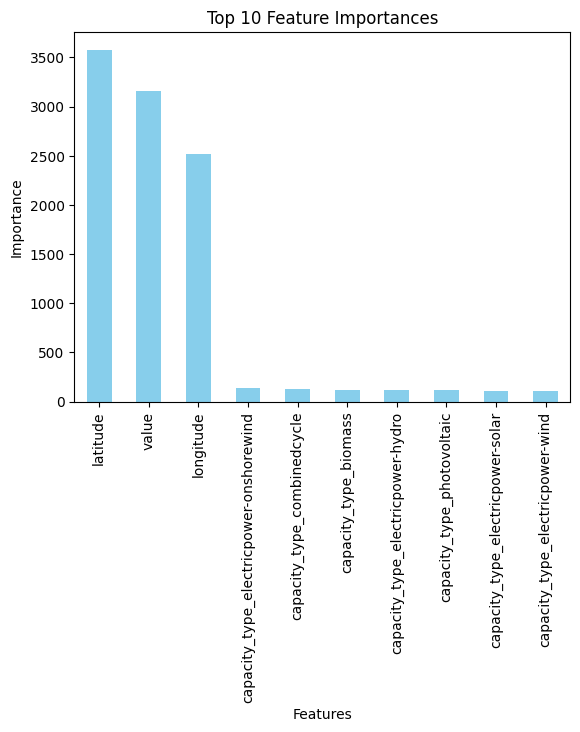

In [108]:
# Obtener las características más importantes
feature_importance = model_with_weights_and_dummy.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': feature_importance.keys(),
    'Importance': feature_importance.values()
}).sort_values(by='Importance', ascending=False)

# Graficar las 10 características más importantes
plt.figure(figsize=(10, 6))
importance_df[:10].plot(kind='bar', x='Feature', y='Importance', legend=False, color='skyblue')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
